### Bollinger Band

In [3]:
#Adjusted Closing Prices of Facebook from Yahoo Finance. 

In [27]:
#import needed libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as web 

In [28]:
#Let's create a function that takes ticker, starting period, ending period as arguments and return a data frame of the Adjusted Close Price 
def get_adj_close (ticker, start, end):
    start = start 
    end = end 
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)
    

In [29]:
#Let's get Adjusted Closing Prices for Facebook, Amazon and Tesla
fb = get_adj_close('fb', '1/1/2016', '30/11/2020')
tesla = get_adj_close('tsla', '1/1/2016', '30/11/2020')
amazon = get_adj_close('amzn', '1/1/2016', '30/11/2020')

In [30]:
#Let's alculate 20-days moving average, std deviation, uper and lower band
for item in (fb, tesla, amazon):
    item['20 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    item['20 Day STD'] = item['Adj Close'].rolling(window=20).std()
    item['Upper band'] = item['20 Day MA'] + 2*item['20 Day STD']
    item['Lower band'] = item['20 Day MA'] - 2*item['20 Day STD']

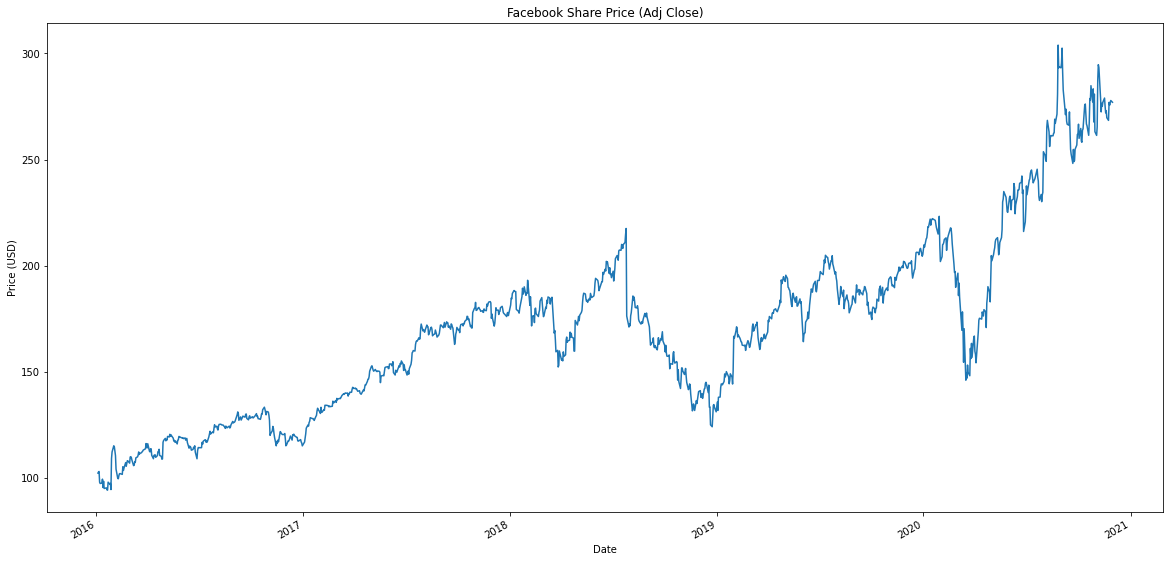

In [48]:
#Let's plot Facebook Share Price
fb['Adj Close'].plot(figsize=(20,10))
plt.title('Facebook Share Price (Adj Close)')
plt.ylabel('Price (USD)')
plt.show()

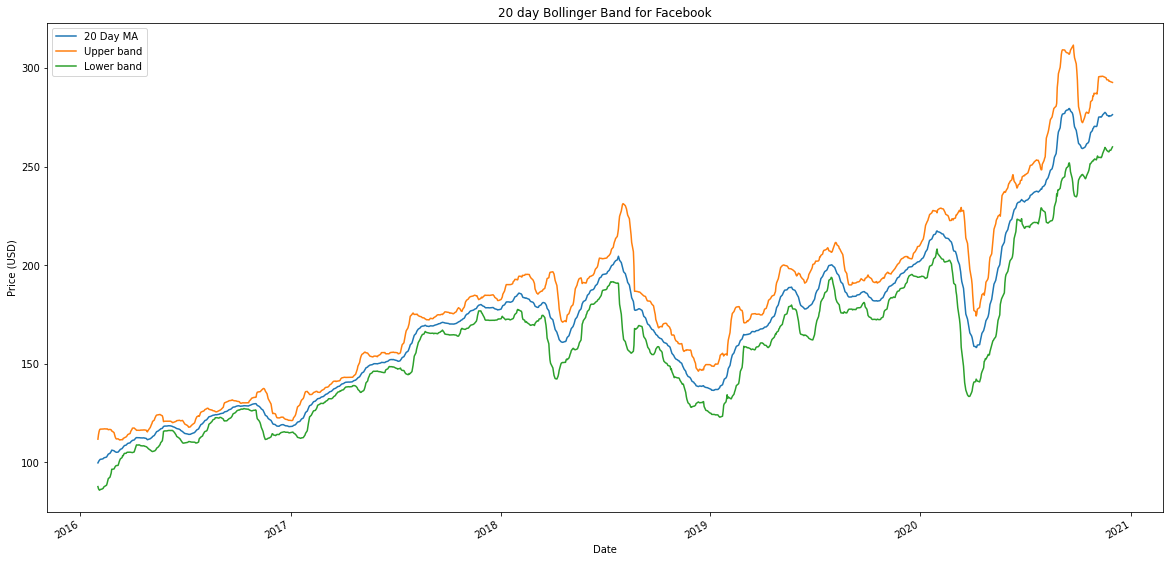

In [45]:
#Let's plot Facebook Bollinger Bands
fb[['20 Day MA', 'Upper band', 'Lower band']].plot(figsize=(20,10))
plt.title('20 day Bollinger Band for Facebook')
plt.ylabel('Price (USD)')
plt.show()

In [41]:
fb.tail(10)

,Adj Close,20 Day MA,20 Day STD,Upper band,Lower band
Date,,,,,
2020-11-16,278.959991,277.100497,9.150793,295.402084,258.798910
2020-11-17,275.000000,277.472498,8.890050,295.252597,259.692398
2020-11-18,271.970001,277.134497,8.967890,295.070277,259.198717
2020-11-19,272.940002,276.875497,9.012619,294.900736,258.850259
2020-11-20,269.700012,276.120998,8.946571,294.014140,258.227855
2020-11-23,268.429993,275.686998,9.105198,293.897394,257.476602
2020-11-24,276.920013,275.368498,8.935069,293.238636,257.498361
2020-11-25,275.589996,275.764497,8.749495,293.263488,258.265507
2020-11-27,277.809998,275.613498,8.683283,292.980064,258.246932


In [86]:
#Let's write a function to automatize the process above 
def Bollinger_Band(company_name, ticker, start, end, moving_avg):
    
        company_name = get_adj_close(ticker, start, end)
        
        for item in (company_name):
            item[str(moving_avg)+' Day MA'] = item['Adj Close'].rolling(window=moving_avg).mean()
            item[str(moving_avg)+' Day STD'] = item['Adj Close'].rolling(window=moving_avg).std()
            item['Upper band'] = item[str(moving_avg)+' Day MA'] + 2*item[str(moving_avg)+' Day STD']
            item['Lower band'] = item[str(moving_avg)+' Day MA'] - 2*item[str(moving_avg)+' Day STD']
            
        company_name[[str(moving_avg)&' Day MA', 'Upper band', 'Lower band']].plot(figsize=(20,10))
        plt.title(str(moving_avg)&' day Bollinger Band for Facebook')
        plt.ylabel('Price (USD)')
        return(plt.show())

In [87]:
#Let's test the function above with Tesla
Bollinger_Band(Tesla, tsla, '1/1/2016', '30/11/2020', 20)

NameError: name 'Tesla' is not defined

In [88]:
def fonction(x, y, z):
    x = y+z
    return x

In [84]:
fonction(30000,10,10)

20

In [1]:
#test 